In [17]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [18]:
data = load_breast_cancer()

x = pd.DataFrame(data.data, columns=data.feature_names)

y= pd.Series(data.target, name="target")


df = pd.concat([x, y], axis=1)

In [19]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.shape

(569, 31)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [23]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<h1 style= "color: #61dffc">EDA (Exploratory Data Analysis)</h1>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

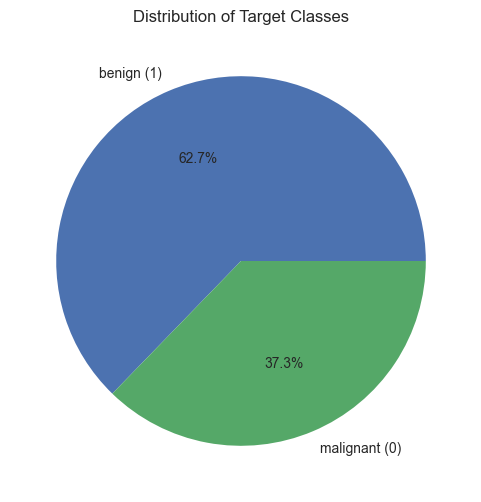

In [25]:
plt.figure(figsize=(6,6))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['benign (1)', 'malignant (0)'])
plt.title("Distribution of Target Classes")
plt.ylabel("")
plt.show()

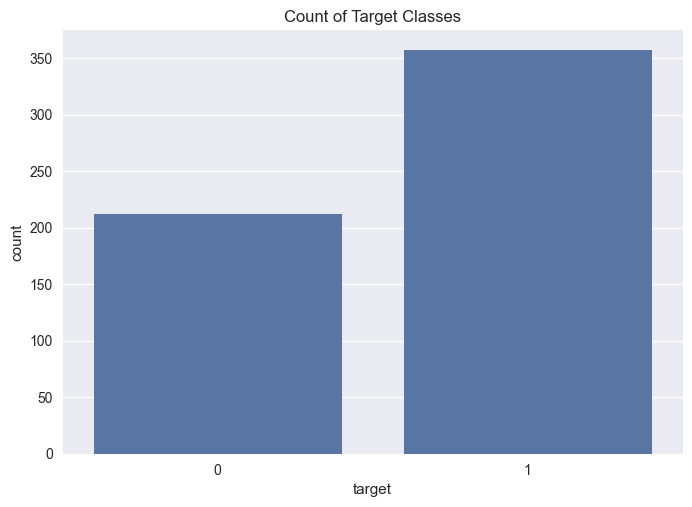

In [26]:
sns.countplot(data=df, x='target')
plt.title("Count of Target Classes")
plt.show()

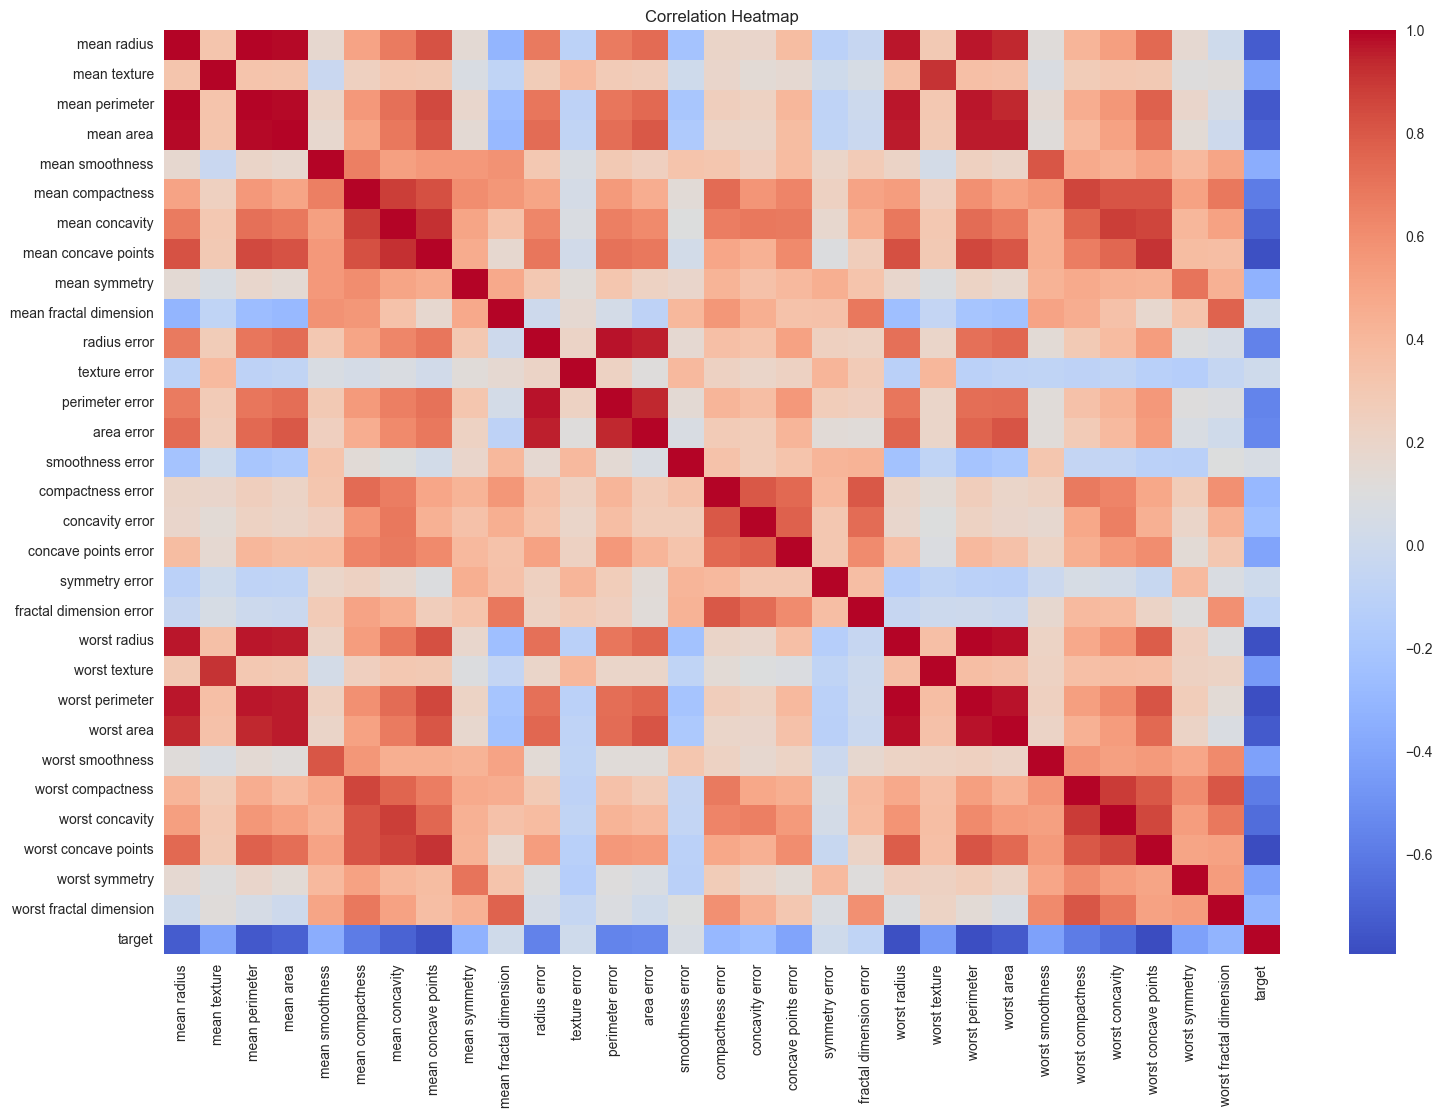

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

<h1 style= "color: #61dffc">Train/Test Split</h1>

In [28]:
x = df.drop('target', axis=1)
y = df['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size= 0.2, random_state=42, stratify=y
)

In [30]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

Step 01: Lojistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



#create model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=2000)

#train model
model.fit(X_train_scaled, y_train)

#make predictions
y_pred = model.predict(X_test_scaled)

#evaluate model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

print("\nClassification Report: \n", classification_report(y_test, y_pred))

print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.9824561403508771

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix: 
 [[41  1]
 [ 1 71]]


In [32]:
import joblib
joblib.dump(model, 'breast_cancer_logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Step 02: RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

#create model
rf_model = RandomForestClassifier(n_estimators = 200,
                                  max_depth = None,
                                  random_state = 42)

#train model
rf_model.fit(X_train, y_train)

#make predictrions
y_pred_rf = rf_model.predict(X_test)

#evalution model
rf_acc = accuracy_score(y_test, y_pred_rf)
print("RandomForest Accuracy: ", rf_acc)

print("\nClassification Report: \n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))

RandomForest Accuracy:  0.956140350877193

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix: 
 [[39  3]
 [ 2 70]]


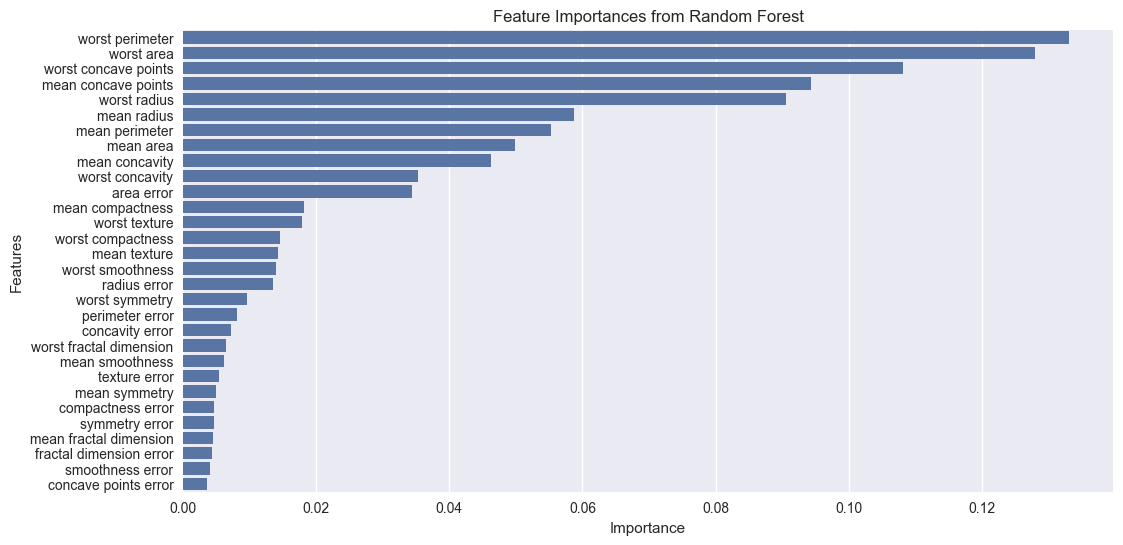

In [34]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(
    x = importances[indices],
    y = np.array(X_train.columns)[indices]
)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

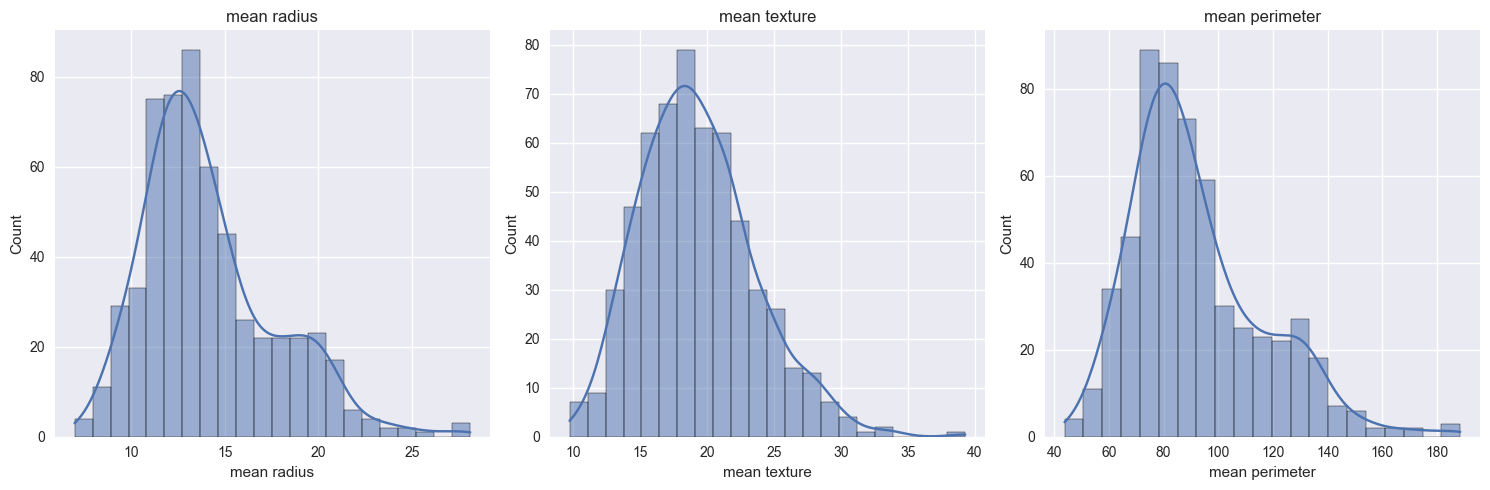

In [35]:
features = ['mean radius', 'mean texture', 'mean perimeter']

plt.figure(figsize=(15,5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()